<center><h1>Module 9 - Part 2</h1></center>

I am going to ask you to put to use what you learned in the first ANN notebook. I will give you a dataset and ask you to build an ANN using all the tools we saw in first notebook.

I'll give you a few results to match but you are pretty much on your own in buidling and testing your model. Your goal is to match or beat my final score using the test data.

I do expect you to use grid-search and not blindly guess at values.

#Challenge 6

We will be using a diabetes study from women in the Pima tribe. The goal is to predict the Outcome column, which is binary. A 1 means you predict that the person will contract diabetes in the future and a 0 they will not.



In [0]:
import numpy
from typing import TypeVar, Callable
narray = TypeVar('numpy.ndarray')

In [0]:
import numpy as np
import math


In [0]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSUePrjXbJSrtSxEsw9fqEC1sz-0_hggsrJPDp6I98HbZOoCod5yNZCNkKJlXp-vmv4QbzFvuB2Y1LT/pub?output=csv'

In [0]:
import pandas as pd

pima_table = pd.read_csv(url,
                          encoding='utf-8')

In [5]:
len(pima_table)

768

In [6]:
pima_table.head(30)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


##Wrangle

For these columns, replace a 0 value with the mean of the column. We are viewing a 0 for these columns as a mistaken entry so will impute the mean as the value. Remember to not use 0 values when computing the mean.

<pre>
['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
</pre>

In [0]:
#your code here
etc = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

for i in etc:
  pima_table[i] = pima_table[i].replace(0, np.NaN)
  cur_mean = pima_table[i].mean()
  pima_table[i] = pima_table[i].replace(np.NaN, cur_mean)
  

In [8]:
pima_table.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


Match my results.

<img src='https://www.dropbox.com/s/5vy48n7le1buj95/Screenshot%202020-02-25%2015.55.42.png?raw=1'>

##Train-Test split

I'll get you started so we are all using the same test set. Allows apples-to-apples comparison of your score to mine.

In [0]:
rsgen = np.random.RandomState(1234)  #use this so we get same values

In [0]:
shuffled_table = pima_table.sample(frac=1, random_state=rsgen).reset_index(drop=True)

In [11]:
shuffled_table.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,113.0,80.0,16.00000,155.548223,31.0,0.874,21,0
1,3,180.0,64.0,25.00000,70.000000,34.0,0.271,26,0
2,7,114.0,64.0,29.15342,155.548223,27.4,0.732,34,1
3,1,125.0,50.0,40.00000,167.000000,33.3,0.962,28,1
4,2,120.0,76.0,37.00000,105.000000,39.7,0.215,29,0


Should match mine.

<img src='https://www.dropbox.com/s/5m5wrkmp3m1e8hd/Screenshot%202020-02-25%2012.19.37.png?raw=1'>

###Use 500 as the split point

Your training set should be first 500 and test set the rest.

First 10 from my test set. Need to align with this to make sure you are legitimately beating my final score.

<img src='https://www.dropbox.com/s/qnhcvp3dxew7aj0/Screenshot%202020-02-25%2016.03.00.png?raw=1'>

#Challenge 7

Ok, go to it. Your goal is to match or exceed my accuracy on the test set of 0.7723880597014925.

Good luck!


In [12]:
#lots of code here


### WRANGLE ###

labels = shuffled_table['Outcome'].tolist()
shuffled_table = shuffled_table.drop(columns=['Outcome'])

from sklearn.preprocessing import minmax_scale
cols = list(shuffled_table)
shuffled_table = pd.DataFrame(minmax_scale(shuffled_table), columns=cols)

training_table = shuffled_table[:500].reset_index(drop=True)
testing_table = shuffled_table[500:].reset_index(drop=True)

training_labels = labels[:500]
testing_labels = labels[500:]

X_train = np.array(training_table.values.tolist())
Y_train = np.array(training_labels)

X_test = np.array(testing_table.values.tolist())
Y_test = np.array(testing_labels)


### PREREQUISITE ###

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found - turn it on under Runtime')
print('Found GPU at: {}'.format(device_name))
from tensorflow.python.keras.layers import Dense, Activation, Dropout
from tensorflow.python.keras import Sequential
from tensorflow.keras.utils import plot_model
from numpy.random import seed
set_random_seed = tf.random.set_seed
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8

def create_model(input_dim=8, lyrs=(4,2), act='relu', opt='adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(1234)
    set_random_seed(1234)
    
    model = Sequential()
    
    # create first hidden layer - must be at least one
    model.add(Dense(units=lyrs[0], input_dim=input_dim, activation=act))
    
    # create additional hidden layers - can be none
    for i in range(1,len(lyrs)):
        model.add(Dense(units=lyrs[i], activation=act))
    
    # add dropout, default is none
    if dr>0 : model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(units=1, activation='sigmoid'))  # output layer will always have sigmoid as activation to give us 0-1 range
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])  #have to change metrics to acc for grid-search
    
    return model

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [13]:
### GRID SEARCH ###

from sklearn.model_selection import GridSearchCV
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

batch_size = [30, 60, 90]  #starting with just a few choices
epochs = [300, 700, 800]    #ditto

#use this to override our defaults. keys must match create_model args
param_grid = dict(batch_size=batch_size, epochs=epochs)

# buld the search grid
grid = GridSearchCV(estimator=model,   #we created model above
                    param_grid=param_grid,
                    cv=3,  #use 3 folds for cross-validation
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=30, epochs=300 .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................ batch_size=30, epochs=300, total=  10.2s
[CV] batch_size=30, epochs=300 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


[CV] ........................ batch_size=30, epochs=300, total=   9.6s
[CV] batch_size=30, epochs=300 .......................................
[CV] ........................ batch_size=30, epochs=300, total=   9.5s
[CV] batch_size=30, epochs=700 .......................................
[CV] ........................ batch_size=30, epochs=700, total=  22.2s
[CV] batch_size=30, epochs=700 .......................................
[CV] ........................ batch_size=30, epochs=700, total=  22.4s
[CV] batch_size=30, epochs=700 .......................................
[CV] ........................ batch_size=30, epochs=700, total=  22.2s
[CV] batch_size=30, epochs=800 .......................................
[CV] ........................ batch_size=30, epochs=800, total=  25.2s
[CV] batch_size=30, epochs=800 .......................................
[CV] ........................ batch_size=30, epochs=800, total=  25.6s
[CV] batch_size=30, epochs=800 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  5.4min finished


Best: 0.767958 using {'batch_size': 30, 'epochs': 700}
0.749910 (0.031884) with: {'batch_size': 30, 'epochs': 300}
0.767958 (0.017762) with: {'batch_size': 30, 'epochs': 700}
0.765938 (0.025097) with: {'batch_size': 30, 'epochs': 800}
0.708006 (0.058705) with: {'batch_size': 60, 'epochs': 300}
0.702018 (0.056571) with: {'batch_size': 60, 'epochs': 700}
0.698014 (0.053996) with: {'batch_size': 60, 'epochs': 800}
0.706010 (0.061211) with: {'batch_size': 90, 'epochs': 300}
0.700010 (0.056329) with: {'batch_size': 90, 'epochs': 700}
0.698002 (0.056229) with: {'batch_size': 90, 'epochs': 800}


In [14]:
### OPTIMISE ###

batch_size = 30
epochs = 700

model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# set up the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2, cv=3)

grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................................... opt=SGD, total=  21.6s
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.6s remaining:    0.0s


[CV] .......................................... opt=SGD, total=  21.3s
[CV] opt=SGD .........................................................
[CV] .......................................... opt=SGD, total=  21.3s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=  25.5s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=  24.7s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=  25.2s
[CV] opt=Adagrad .....................................................
[CV] ...................................... opt=Adagrad, total=  21.7s
[CV] opt=Adagrad .....................................................
[CV] ...................................... opt=Adagrad, total=  22.0s
[CV] opt=Adagrad .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  7.2min finished


Best: 0.767958 using {'opt': 'Adam'}
0.641957 (0.024760) with: {'opt': 'SGD'}
0.708030 (0.059604) with: {'opt': 'RMSprop'}
0.641957 (0.024760) with: {'opt': 'Adagrad'}
0.641945 (0.022960) with: {'opt': 'Adadelta'}
0.767958 (0.017762) with: {'opt': 'Adam'}
0.710050 (0.058916) with: {'opt': 'Nadam'}


In [15]:
### HIDDEN LAYERS ###

# create model
model = KerasClassifier(build_fn=create_model,
                        epochs=epochs, batch_size=batch_size, verbose=0)

# define the grid search parameters
layers = ((8,),(10,),(10,5),(12,6),(12,8,4), (4,2))  #try 5 different layers
opt = ['Adam']  #best choice from previous search
param_grid = dict(lyrs=layers, opt=opt)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2, cv=3)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] lyrs=(8,), opt=Adam .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. lyrs=(8,), opt=Adam, total=  21.7s
[CV] lyrs=(8,), opt=Adam .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.7s remaining:    0.0s


[CV] .............................. lyrs=(8,), opt=Adam, total=  21.7s
[CV] lyrs=(8,), opt=Adam .............................................
[CV] .............................. lyrs=(8,), opt=Adam, total=  21.1s
[CV] lyrs=(10,), opt=Adam ............................................
[CV] ............................. lyrs=(10,), opt=Adam, total=  21.1s
[CV] lyrs=(10,), opt=Adam ............................................
[CV] ............................. lyrs=(10,), opt=Adam, total=  21.5s
[CV] lyrs=(10,), opt=Adam ............................................
[CV] ............................. lyrs=(10,), opt=Adam, total=  21.2s
[CV] lyrs=(10, 5), opt=Adam ..........................................
[CV] ........................... lyrs=(10, 5), opt=Adam, total=  22.5s
[CV] lyrs=(10, 5), opt=Adam ..........................................
[CV] ........................... lyrs=(10, 5), opt=Adam, total=  22.4s
[CV] lyrs=(10, 5), opt=Adam ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  6.7min finished


Best: 0.767958 using {'lyrs': (4, 2), 'opt': 'Adam'}
0.765938 (0.023113) with: {'lyrs': (8,), 'opt': 'Adam'}
0.755970 (0.010889) with: {'lyrs': (10,), 'opt': 'Adam'}
0.753938 (0.025126) with: {'lyrs': (10, 5), 'opt': 'Adam'}
0.735890 (0.039085) with: {'lyrs': (12, 6), 'opt': 'Adam'}
0.740002 (0.002537) with: {'lyrs': (12, 8, 4), 'opt': 'Adam'}
0.767958 (0.017762) with: {'lyrs': (4, 2), 'opt': 'Adam'}


In [16]:
#DROPOUT

model = KerasClassifier(build_fn=create_model, 
                        epochs=epochs, batch_size=batch_size, verbose=0)

# define the grid search parameters
layers = ((4,2),)
opt = ['Adam']  #from previous
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops, opt=opt, lyrs=layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
grid_result = grid.fit(X_train, Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] dr=0.0, lyrs=(4, 2), opt=Adam ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... dr=0.0, lyrs=(4, 2), opt=Adam, total=  22.6s
[CV] dr=0.0, lyrs=(4, 2), opt=Adam ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.6s remaining:    0.0s


[CV] .................... dr=0.0, lyrs=(4, 2), opt=Adam, total=  22.9s
[CV] dr=0.0, lyrs=(4, 2), opt=Adam ...................................
[CV] .................... dr=0.0, lyrs=(4, 2), opt=Adam, total=  22.8s
[CV] dr=0.01, lyrs=(4, 2), opt=Adam ..................................
[CV] ................... dr=0.01, lyrs=(4, 2), opt=Adam, total=  23.4s
[CV] dr=0.01, lyrs=(4, 2), opt=Adam ..................................
[CV] ................... dr=0.01, lyrs=(4, 2), opt=Adam, total=  23.7s
[CV] dr=0.01, lyrs=(4, 2), opt=Adam ..................................
[CV] ................... dr=0.01, lyrs=(4, 2), opt=Adam, total=  23.7s
[CV] dr=0.05, lyrs=(4, 2), opt=Adam ..................................
[CV] ................... dr=0.05, lyrs=(4, 2), opt=Adam, total=  23.5s
[CV] dr=0.05, lyrs=(4, 2), opt=Adam ..................................
[CV] ................... dr=0.05, lyrs=(4, 2), opt=Adam, total=  23.2s
[CV] dr=0.05, lyrs=(4, 2), opt=Adam ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  7.0min finished


Best: 0.767958 using {'dr': 0.0, 'lyrs': (4, 2), 'opt': 'Adam'}
0.767958 (0.017762) with: {'dr': 0.0, 'lyrs': (4, 2), 'opt': 'Adam'}
0.761934 (0.025312) with: {'dr': 0.01, 'lyrs': (4, 2), 'opt': 'Adam'}
0.749910 (0.032257) with: {'dr': 0.05, 'lyrs': (4, 2), 'opt': 'Adam'}
0.695982 (0.059033) with: {'dr': 0.1, 'lyrs': (4, 2), 'opt': 'Adam'}
0.737850 (0.053230) with: {'dr': 0.2, 'lyrs': (4, 2), 'opt': 'Adam'}
0.721894 (0.040389) with: {'dr': 0.5, 'lyrs': (4, 2), 'opt': 'Adam'}


Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_252 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_253 (Dense)            (None, 2)                 10        
_________________________________________________________________
dense_254 (Dense)            (None, 1)                 3         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
None
500/500 [==============================] - 0s 74us/sample - loss: 0.4630 - acc: 0.7680

acc: 76.80%


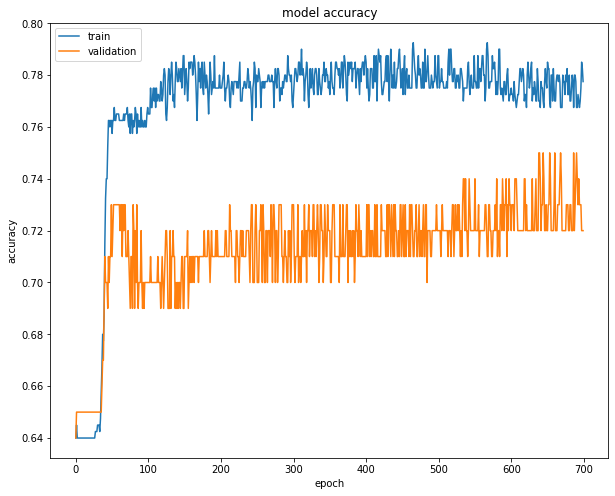

In [17]:
# Train
model = create_model(lyrs=(4,2), dr=0.0, opt='Adam')

print(model.summary())

# train model on full train set, with 80/20 validation split
training = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, 
                     validation_split=0.2,  #see discussion above
                     verbose=0)

# evaluate the model
scores = model.evaluate(X_train, Y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Final say

Use test set to get final accuracy score.

In [18]:
# calculate predictions
raw_predictions = model.predict(X_test)
predictions = [int(round(x[0])) for x in raw_predictions]
cases = list(zip(predictions, Y_test))

(cases.count((0,0)) + cases.count((1,1)))/len(X_test)  #0.7723880597014925 for me

0.7798507462686567